In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

try:
    import cPickle as pickle
except ImportError:
    import pickle

%matplotlib inline

#Esto afecta aspectos como el tamaño de las etiquetas, líneas y otros elementos de la trama, pero no el estilo general
sns.set_context("paper")
#Establecer el estilo estético de las parcelas
sns.set_style("whitegrid")
#Establece el conjunto de colores
sns.set_palette("Set1")

plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['axes.labelsize'] = 'large'

# Dataset 

## Información general
Emo-DB | Berlin 
--- | --- 
Idioma | Alemán
Muestras | 535
Emociones | anger boredom disgust anxiety/fear happiness sadness neutral
Nº de actores | 10 (5H 5M)
Naturaleza | Simulada
URLs | [Documentación](http://emodb.bilderbar.info/index-1024.html) 

**Archivos**

carácteristica | valor
--- | --- 
codec | PCM S16 LE
channels | Mono
sample rate  | 16000 Hz
bit rate | 16 kbps



## Selección de muestras
Emociones de estudio:
- anger 
- disgust 
- fear 
- happiness 
- sadness

Cargando el objeto del dataset

In [3]:
dataset = "berlin-01234"
dataset_path = dataset + "/"
print("Loading data from " + dataset + " data set...")
ds = pickle.load(open(dataset_path + dataset + '_db.p', 'rb'))
number_samples = len(ds.targets)

Loading data from berlin-01234 data set...


**Número de muestras**

In [4]:
print("Number of samples: " + str(number_samples))

Number of samples: 375


**Distribución de duración** de los audios

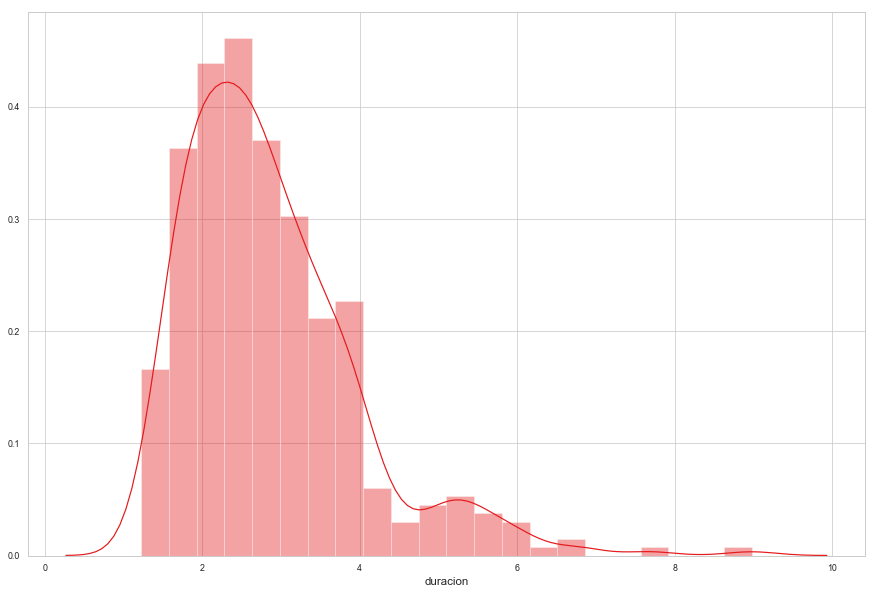

In [6]:
duracion = []
for i in range(0, number_samples):
    duracion.append((ds.data[i][0].size) / 16000)

df_duracion = pd.Series(data=duracion, name="duracion")
sns.distplot(df_duracion)

Numero de **muestras por emoción**:

In [7]:
emotion_dic = {
    0: 'anger',
    1: 'disgust',
    2: 'fear',
    3: 'happiness',
    4: 'sadness',
    5: 'surprise',
    6: 'neutral',
    7: 'calm',
    8: 'boredom'
}
df_emotions = pd.Series(data=ds.targets, name="emotion", dtype="category")
df_emotions = df_emotions.map(lambda i: emotion_dic[i])
df_emotions.value_counts()

anger        127
happiness     71
fear          69
sadness       62
disgust       46
Name: emotion, dtype: int64

**Distribución de duración según la emoción**

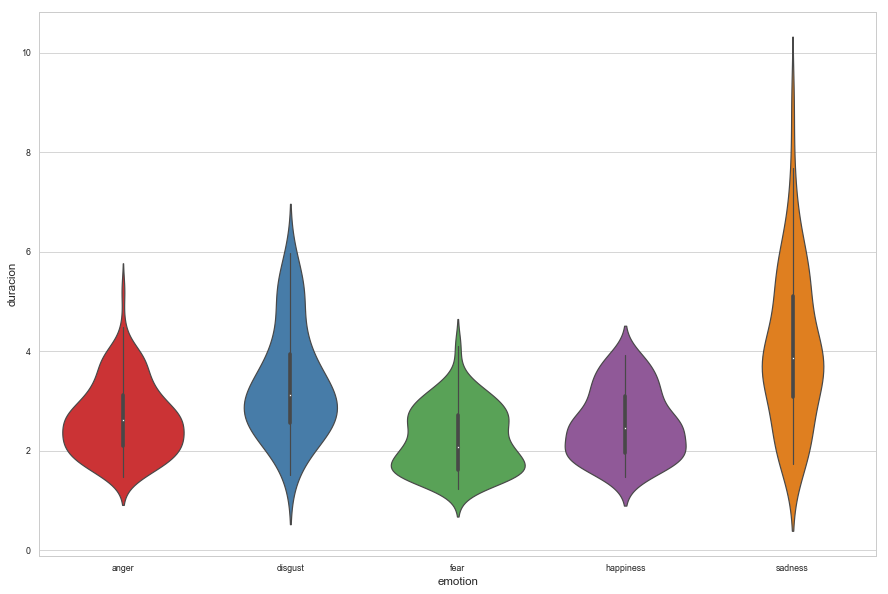

In [8]:
df_aux = pd.concat([df_emotions, df_duracion], axis=1)
sns.violinplot(x=df_aux["emotion"], y=df_aux["duracion"])

# Características

Cargando el array tridimensional de características

In [9]:
label_features = [
    'zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread',
    'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1',
    'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8',
    'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1',
    'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7',
    'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12',
    'chroma_std', 'harmonic_ratio', 'pitch'
]


print("Loading features from file...\n")
features = pickle.load(open(dataset_path + dataset + '_features.p', 'rb'))

Loading features from file...



Creando un **dataframe con MultiIndex** a partir del objeto tridimensional

In [10]:
df = pd.DataFrame()
audio_index = []
row_index = []
i = 0
for single_audio in features:
    audio_index = np.full(shape=len(single_audio), fill_value=i)
    row_index = np.arange(len(single_audio))
    index_df = pd.DataFrame({"audio_number": audio_index, "row": row_index})

    single_audio_df = pd.DataFrame(single_audio, columns=label_features)

    aux_df = pd.concat([index_df, single_audio_df], axis=1)

    df = pd.concat([df, aux_df], axis=0, ignore_index=True)
    i += 1

df = df.set_index(["audio_number", "row"])
df

zcr    energy  energy_entropy  spectral_centroid  \
audio_number row                                                          
0            0    0.167016  0.163809        0.588712           0.183178   
             1    0.161524  0.161528        0.625422           0.173026   
             2    0.165041  0.165044        0.632432           0.178600   
             3    0.161103  0.161106        0.629467           0.177717   
             4    0.163598  0.163599        0.567823           0.187367   
             5    0.171034  0.161516        0.521895           0.191657   
             6    0.170960  0.161263        0.504877           0.183780   
             7    0.160732  0.160733        0.586930           0.180968   
             8    0.164588  0.159694        0.563309           0.185200   
             9    0.173018  0.163582        0.503298           0.196310   
             10   0.174039  0.170364        0.537143           0.190913   
             11   0.157320  0.157322        0.627971           0.174581   
             12   0.161143  0.161145        0.608950           0.178768   
             13   0.161876  0.161879        0.590078           0.174765   
             14   0.168653  0.165398        0.536345           0.191330   
             15   0.163425  0.160334        0.609294           0.189957   
             16  -0.068904 -0.069828        0.046618          -0.054471   
             17  -0.081985 -0.086468       -0.014046          -0.071667   
             18  -0.127203 -0.130579       -0.032216          -0.124344   
             19  -0.095884 -0.099726        0.105975          -0.091729   
             20  -0.136131 -0.137214       -0.033504          -0.133056   
             21  -0.135345 -0.137235       -0.034583          -0.132797   
             22  -0.135703 -0.137811       -0.033839          -0.133212   
             23  -0.134945 -0.136112       -0.034254          -0.130404   
             24  -0.134158 -0.136341       -0.034463          -0.130374   
             25  -0.134577 -0.137355       -0.031275          -0.131388   
             26  -0.133480 -0.135884       -0.029537          -0.129001   
             27  -0.133806 -0.135859       -0.026585          -0.129072   
             28  -0.133857 -0.135638       -0.026637          -0.128321   
             29  -0.131953 -0.134074       -0.024050          -0.125684   
...                    ...       ...             ...                ...   
374          290 -0.139953 -0.142248       -0.054926          -0.136711   
             291 -0.135846 -0.138947       -0.049864          -0.132370   
             292  0.218881  0.191619        0.791411           0.232604   
             293  0.231863  0.204269        0.831393           0.249603   
             294  0.216439  0.189386        0.789678           0.233034   
             295  0.217698  0.188816        0.779594           0.232732   
             296  0.214363  0.185827        0.792526           0.229259   
             297  0.212833  0.183557        0.809609           0.226516   
             298 -0.126765 -0.132048       -0.021932          -0.124676   
             299  0.213208  0.183727        0.719907           0.221917   
             300  0.207593  0.179265        0.663556           0.211755   
             301  0.202794  0.175148        0.700320           0.205752   
             302 -0.159986 -0.160981       -0.139709          -0.159331   
             303  0.197977  0.173386        0.663091           0.214615   
             304  0.195879  0.171877        0.650302           0.209474   
             305 -0.160239 -0.161033       -0.142738          -0.159809   
             306 -0.159952 -0.160778       -0.141773          -0.159315   
             307 -0.150574 -0.151963       -0.107230          -0.148942   
             308  0.164692  0.158522        0.619601           0.189646   
             309  0.173396  0.163584        0.594163           0.195942   
             310 -0.140407 -0.143714       -0.07

Función para la representación de los boxplot de cada caraterística

In [11]:
def display_boxplot(feature, df, df_emotions):
    df_features_mean = pd.DataFrame(columns=label_features)
    for i in range(0, df_emotions.size):
        df_features_mean = df_features_mean.append(df.loc[i].mean(),
                                                   ignore_index=True)
    df_aux = pd.concat([df_emotions, df_features_mean], axis=1)

    sns.boxplot(x=df_aux["emotion"], y=df_aux[feature])
    plt.xlabel("emotion", fontsize=20)
    plt.ylabel(feature, fontsize=20)
    plt.tick_params(labelsize=17)
    plt.show()

## Zero Crossing Rate (zcr)

ZCR calcula el **promedio ponderado de la cantidad de veces que la señal de voz cambia de signo** dentro de una ventana de tiempo particular.


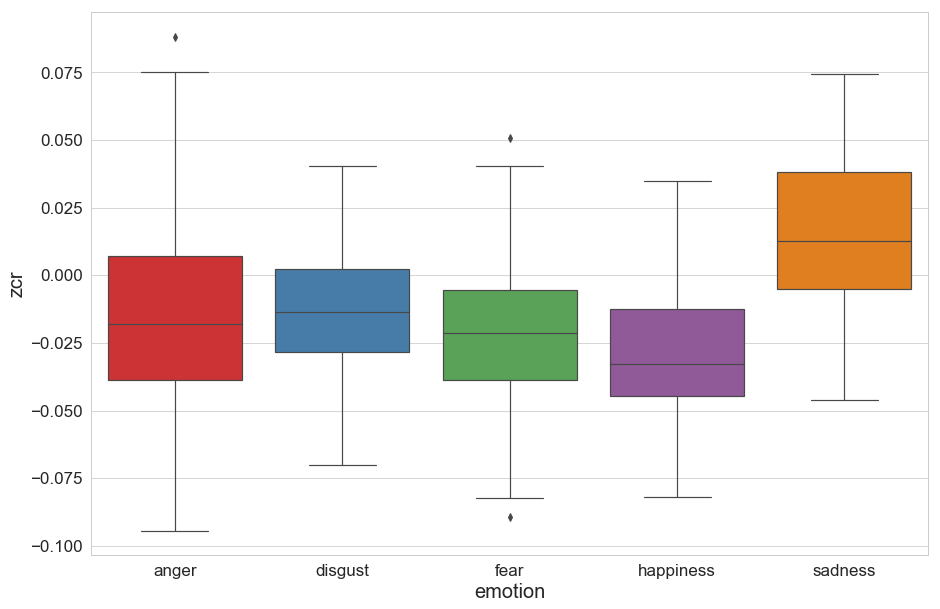

In [12]:
display_boxplot("zcr", df, df_emotions)

## Energy (energy)

Log-energy indica la amplitud cuadrada total en un segmento del habla. 
Esta característica es simplemente la **cantidad de potencia o volumen normalizado en la señal.**

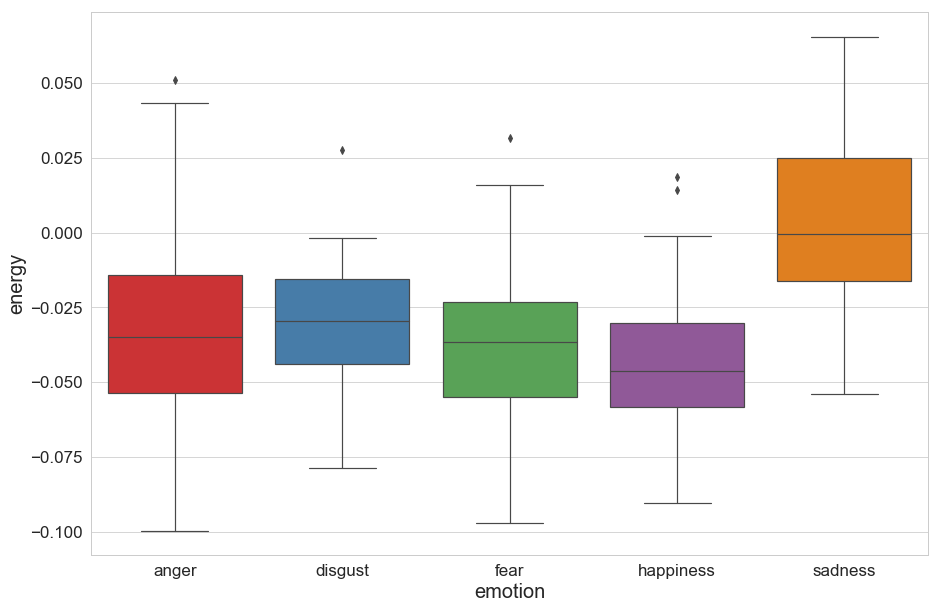

In [13]:
display_boxplot("energy", df, df_emotions)

## Entropy of Energy (energy_entropy)

La entropía de las energías normalizadas de los sub-frames. Puede interpretarse como una medida de cambios abruptos.

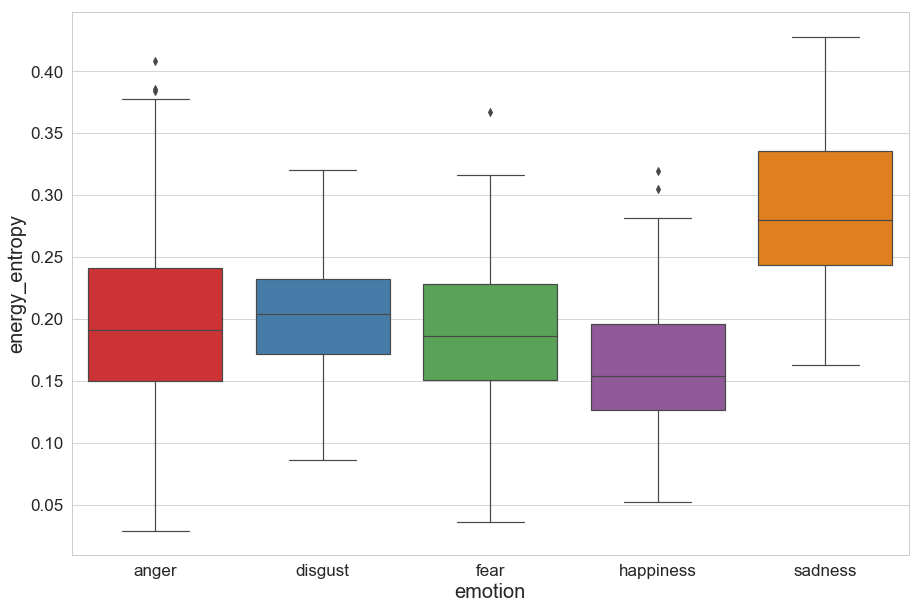

In [14]:
display_boxplot("energy_entropy", df, df_emotions)

## Pitch (pitch)

El tono puede cuantificarse como una frecuencia, pero el tono no es una propiedad física puramente objetiva; es un atributo psicoacústico subjetivo del sonido.

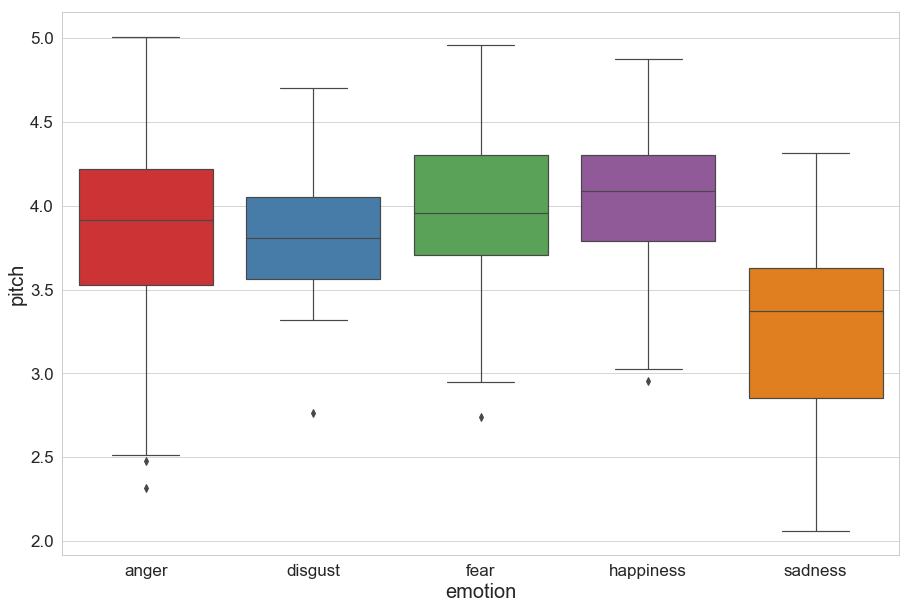

In [15]:
display_boxplot("pitch", df, df_emotions)

## Harmonic ratio (harmonic_ratio)

El ratio entre la energia en la porción armónica del frame respecto a la total.

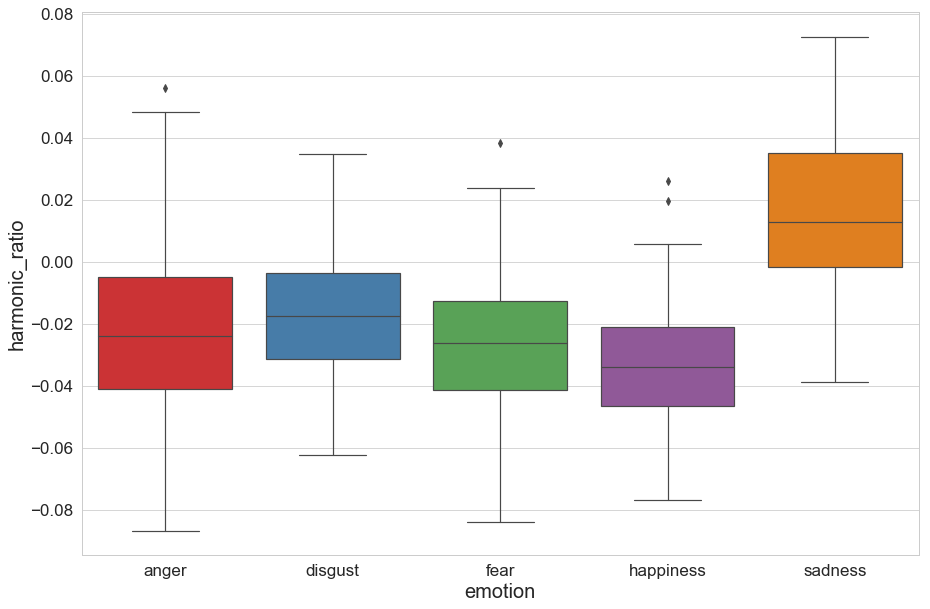

In [16]:
display_boxplot("harmonic_ratio", df, df_emotions)

# Spectral

## Spectral Centroid (spectral_centroid)

El centro de gravedad del espectro.

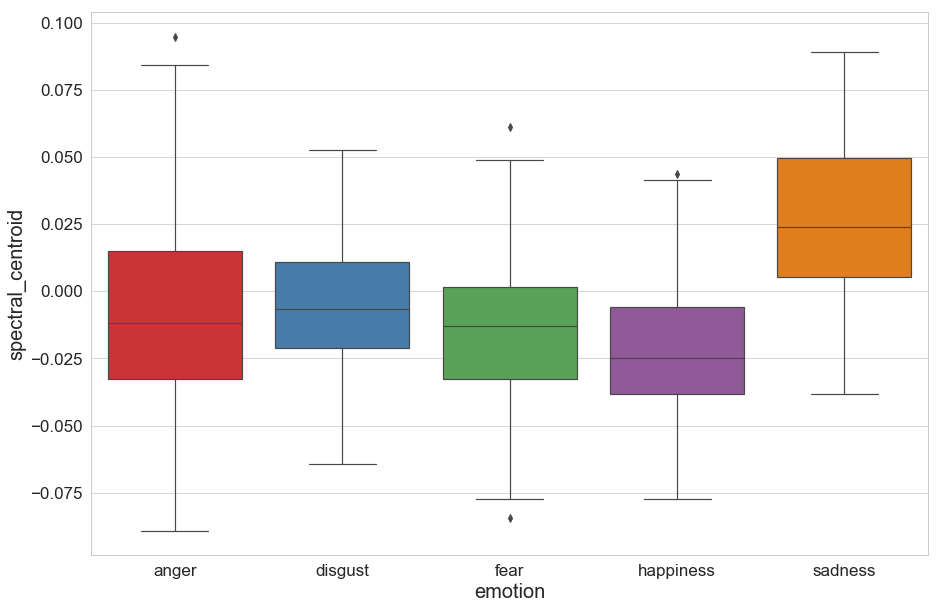

In [17]:
display_boxplot("spectral_centroid", df, df_emotions)

## Spectral Spread (spectral_spread)

The second central moment of the spectrum.

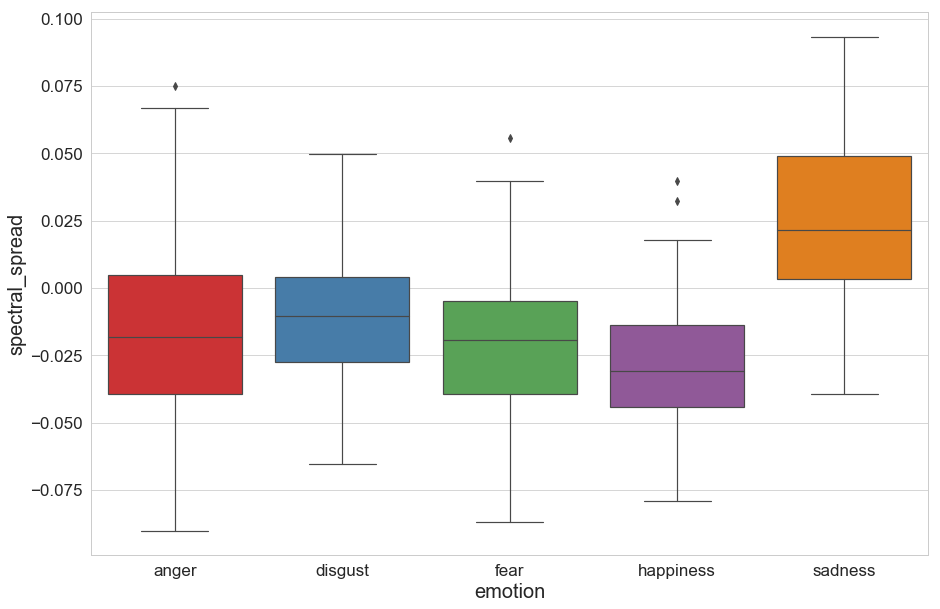

In [18]:
display_boxplot("spectral_spread", df, df_emotions)

## Spectral Entropy (spectral_entropy)

Entropía de las energías espectrales normalizadas para un conjunto de subframes.

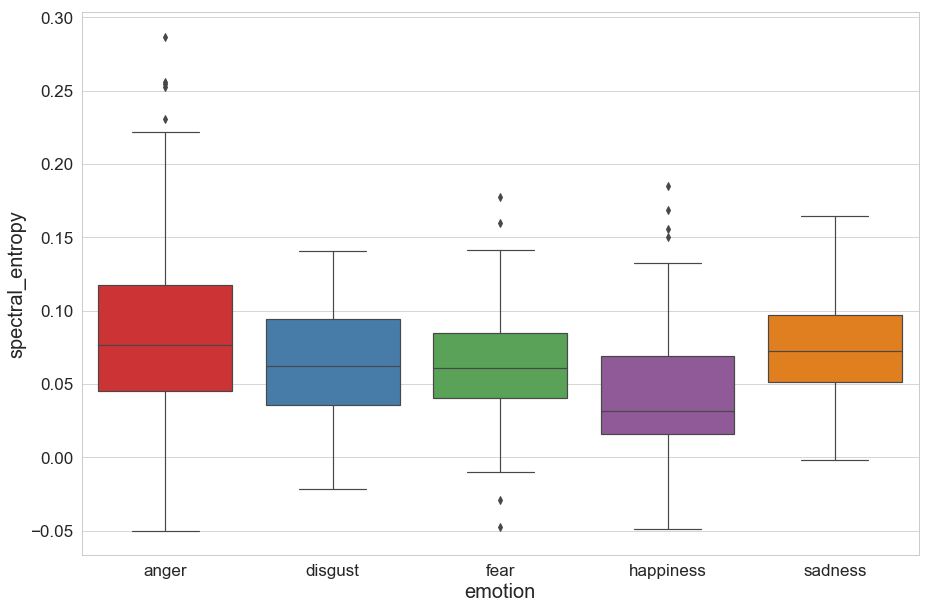

In [19]:
display_boxplot("spectral_entropy", df, df_emotions)

## Spectral Flux (spectral_flux)

La diferencia al cuadrado entre las magnitudes normalizadas de los espectros de los dos frames sucesivos.

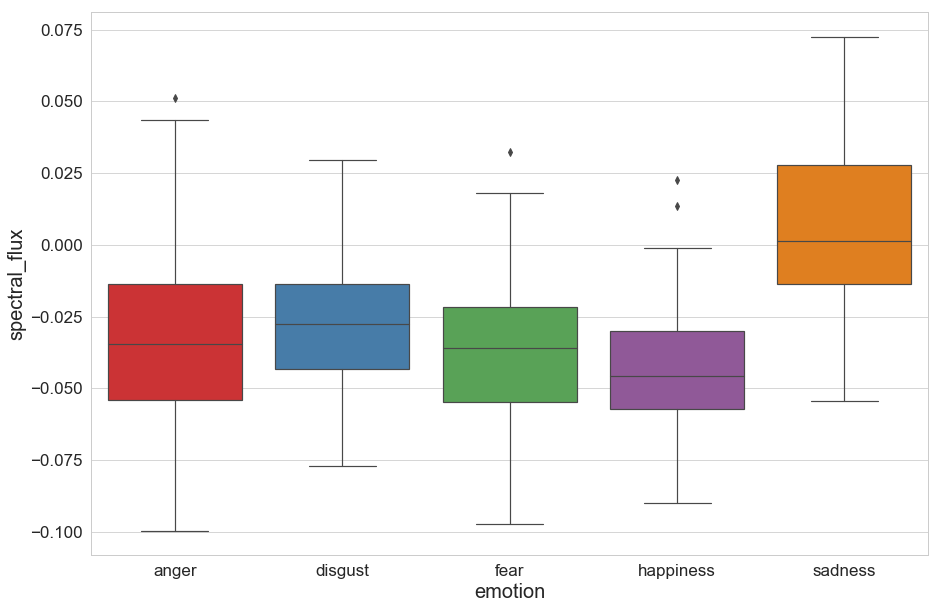

In [20]:
display_boxplot("spectral_flux", df, df_emotions)

## Spectral Rolloff (spectral_rolloff)

La frecuencia por debajo de la cual se concentra el 90% de la distribución de la magnitud del espectro.

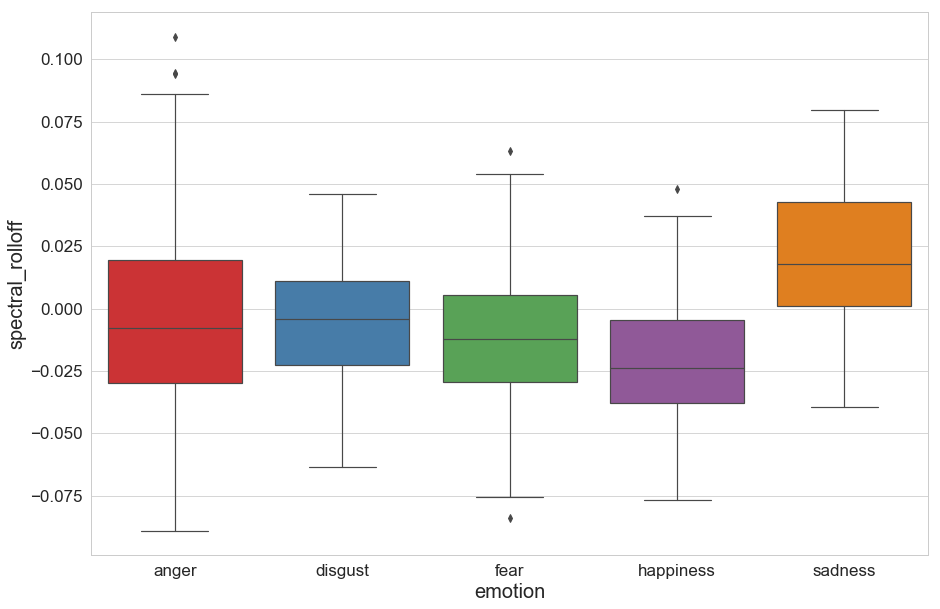

In [21]:
display_boxplot("spectral_rolloff", df, df_emotions)

## MFCCs  (mfcc_< X >)

Los Mel Frequency Cepstral Coeﬃcients (Coeﬁcientes Cepstrales en las Frecuencias de Mel) o MFCCs **son coeﬁcientes para la representación del habla basados en la percepción auditiva humana**.

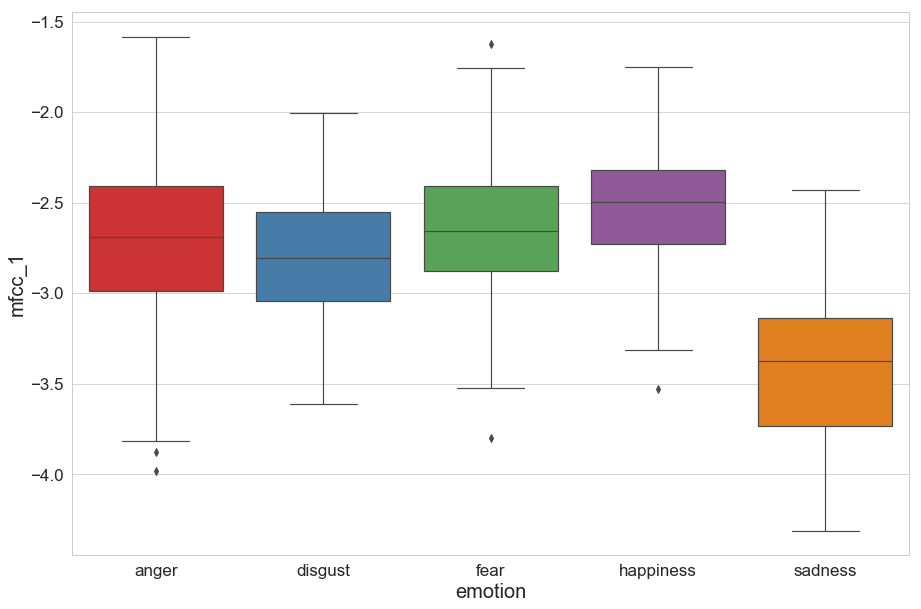

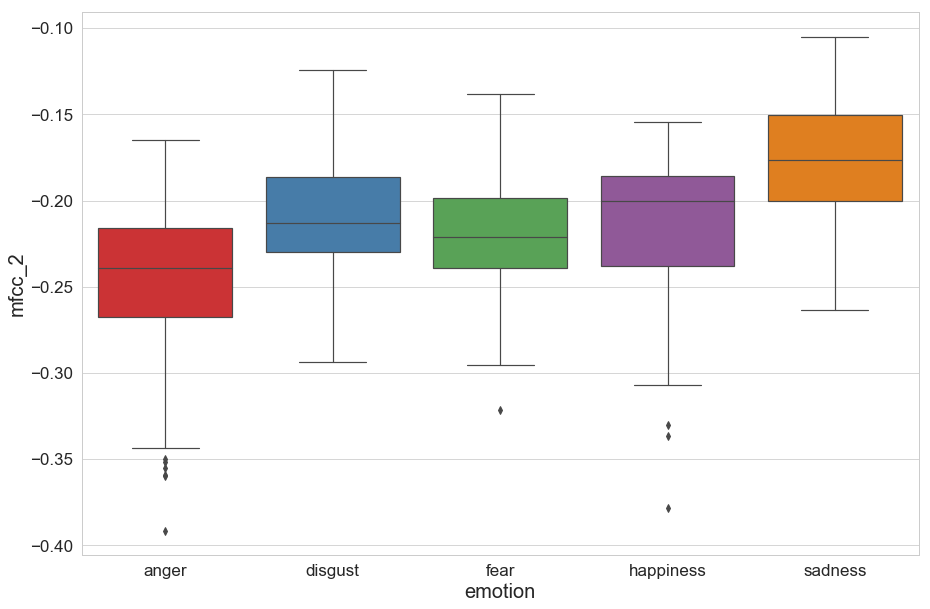

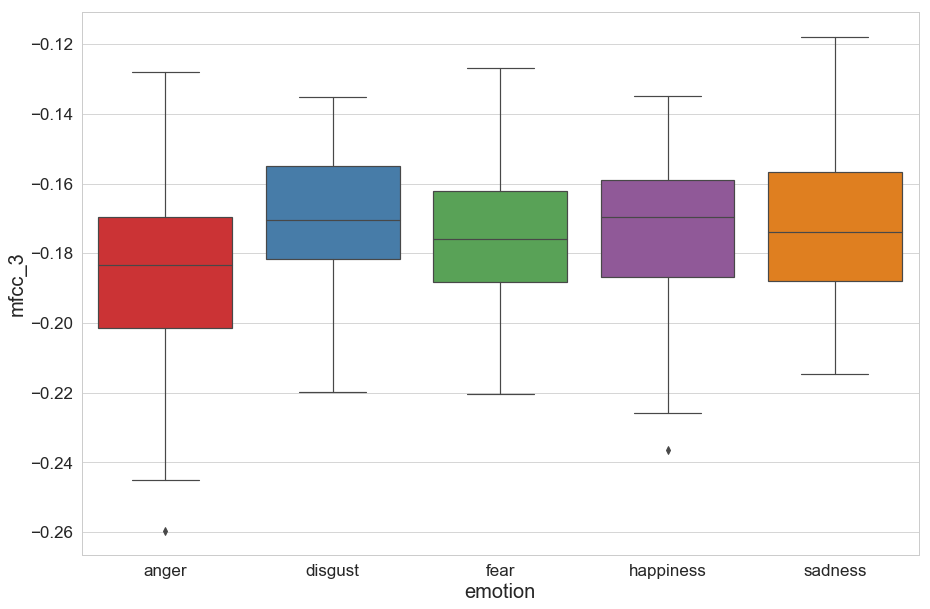

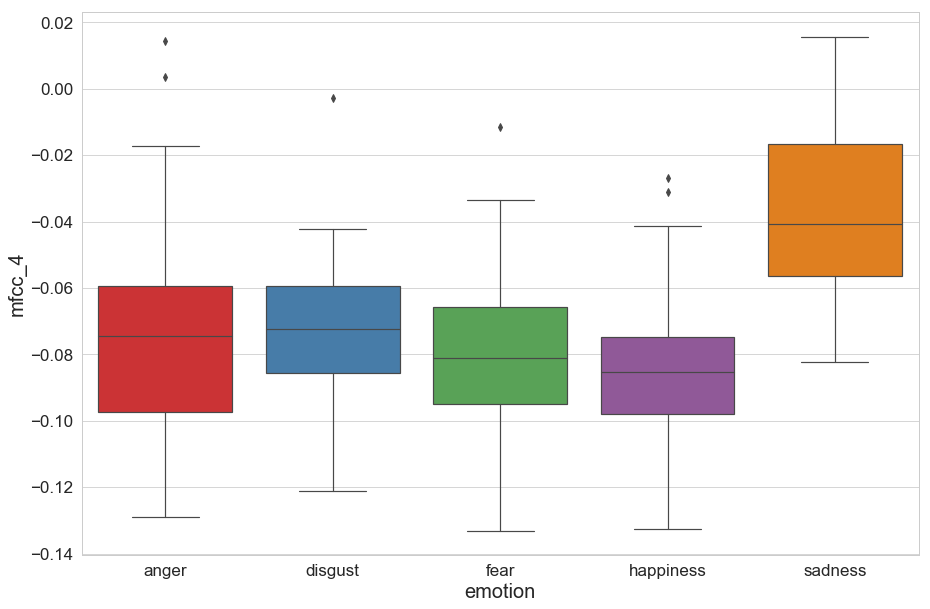

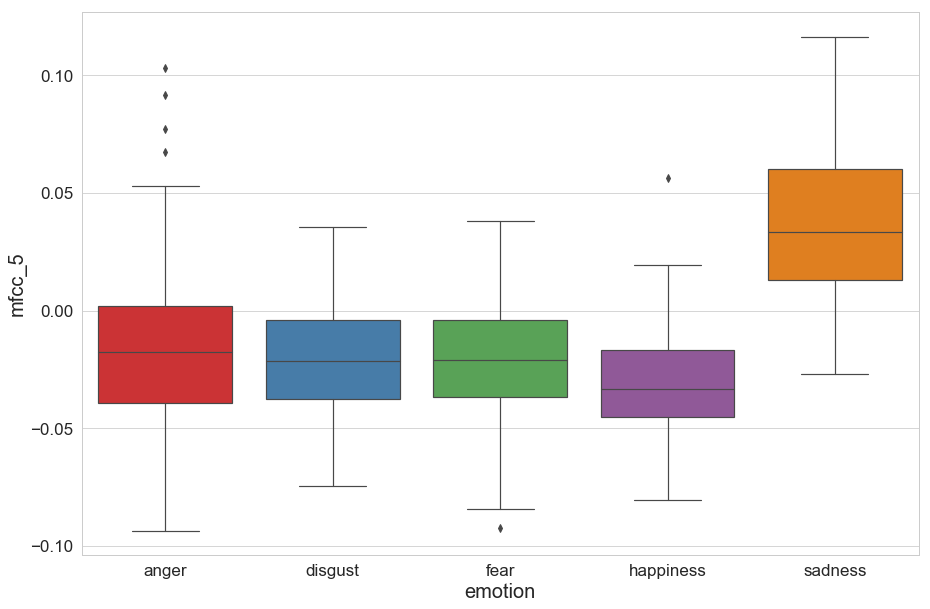

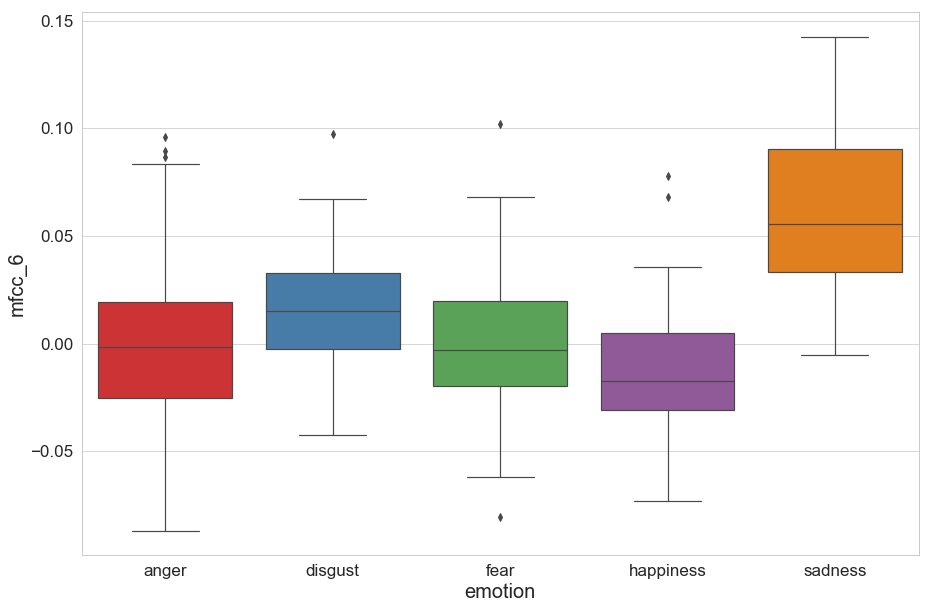

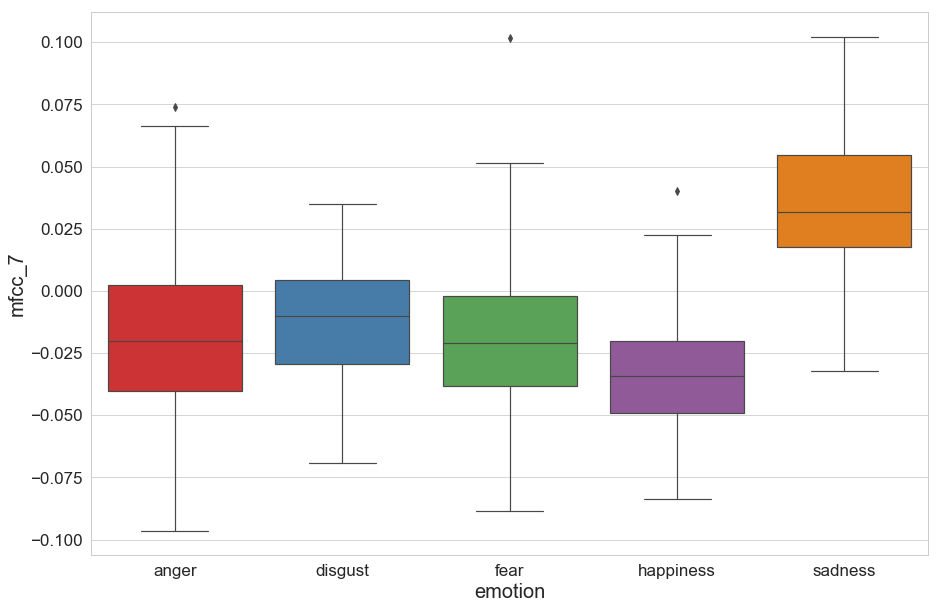

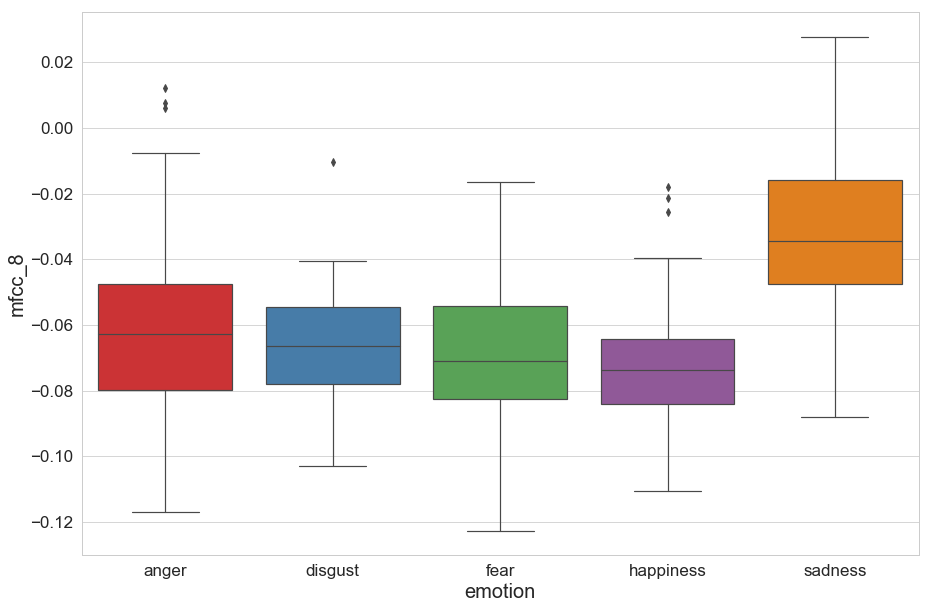

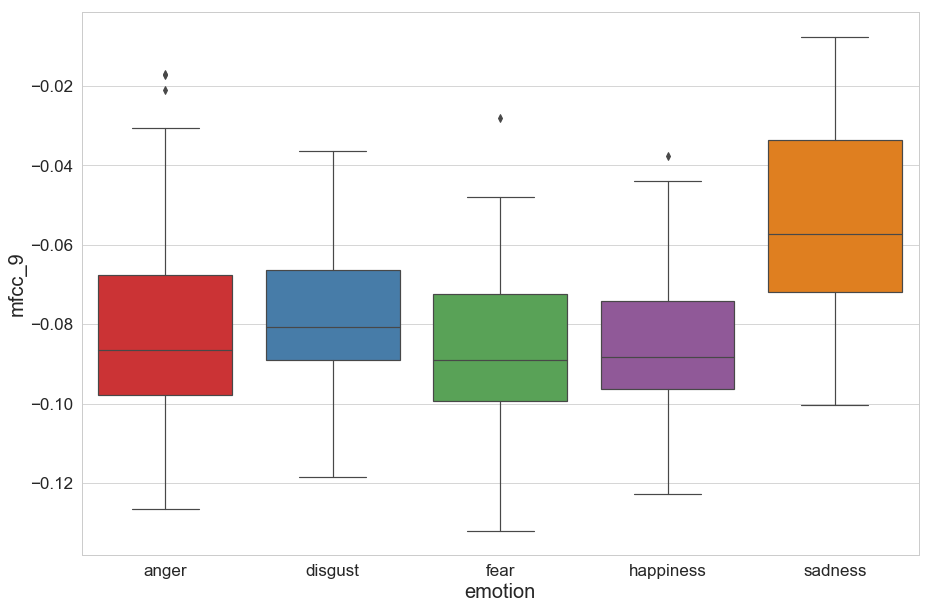

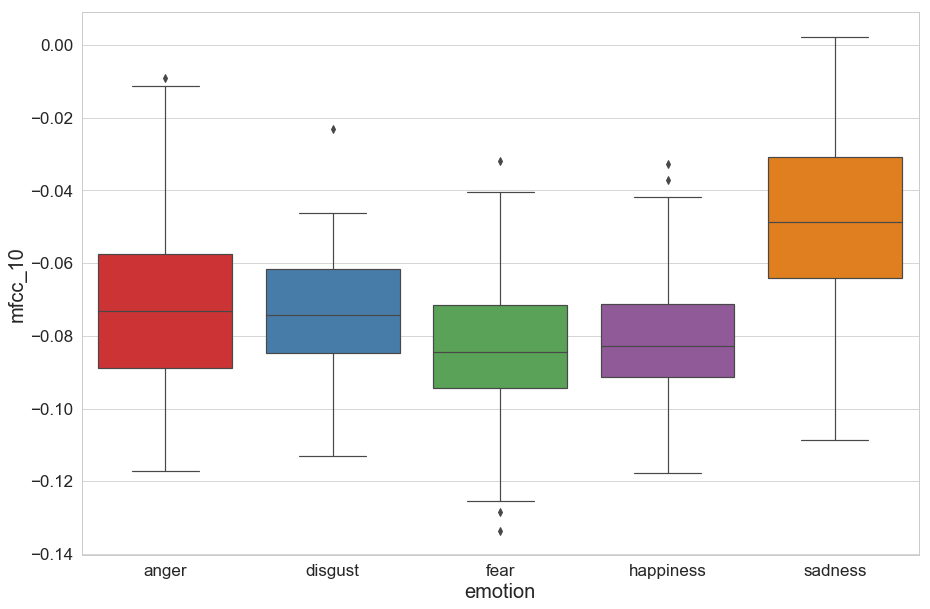

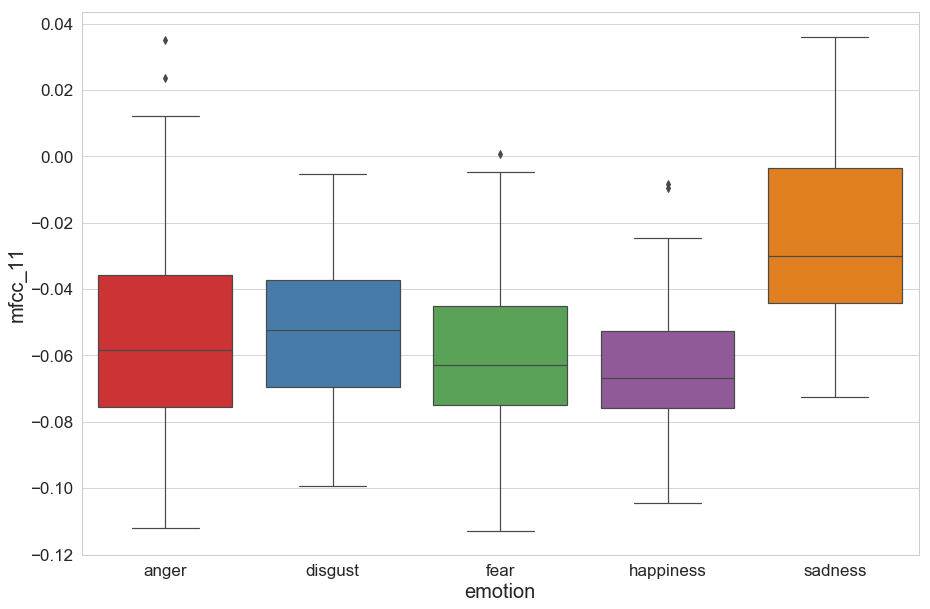

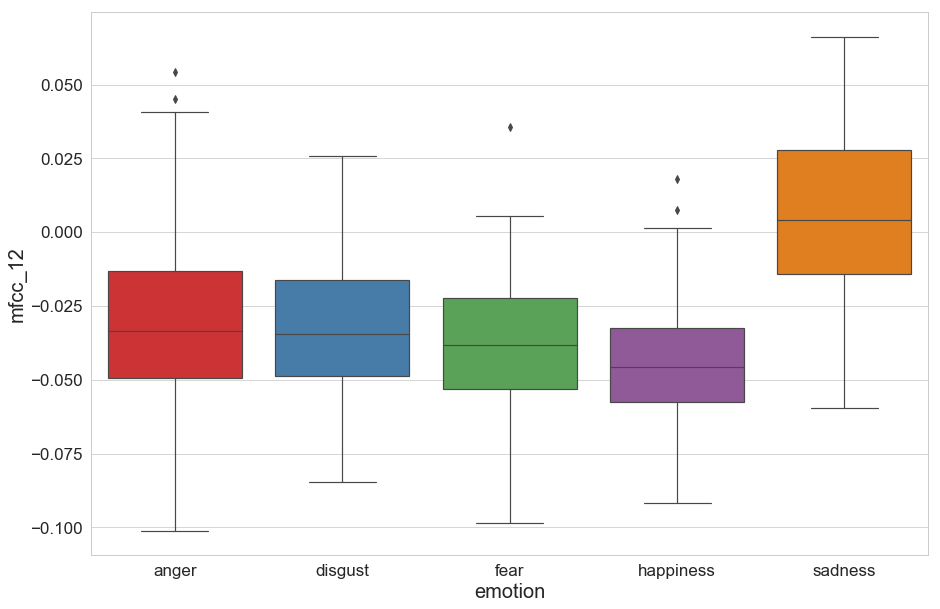

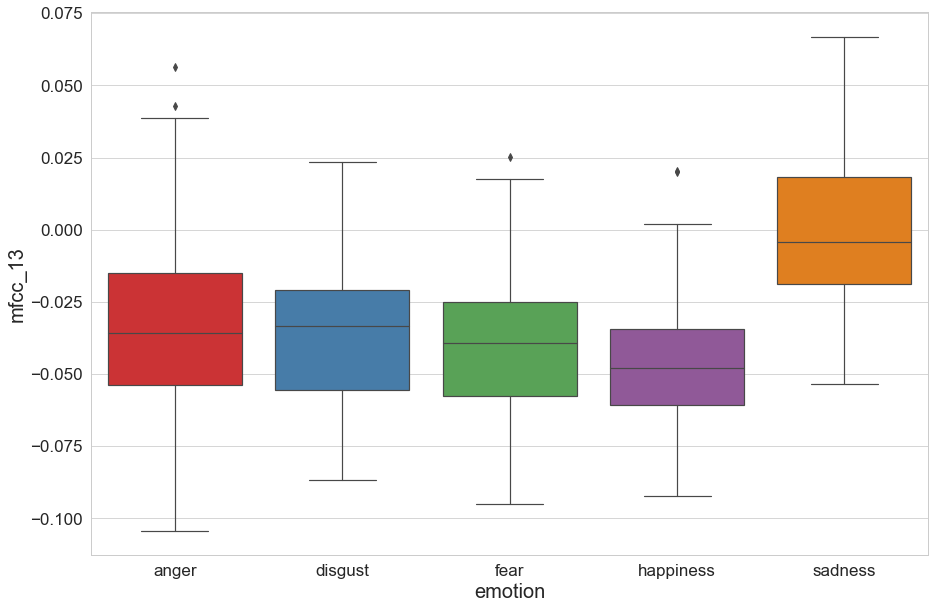

In [22]:
for mfcc in label_features[8:21]:
    display_boxplot(mfcc, df, df_emotions)

## Chroma Vector (chroma_< X >) - Chroma Deviation (chroma_std)

Una representación de 12 elementos de la energía espectral en la que los intervalos **representan las 12 clases de tonos de la música de tipo occidental** (espaciado de semitono).

La desviación estándar de los 12 coeficientes 

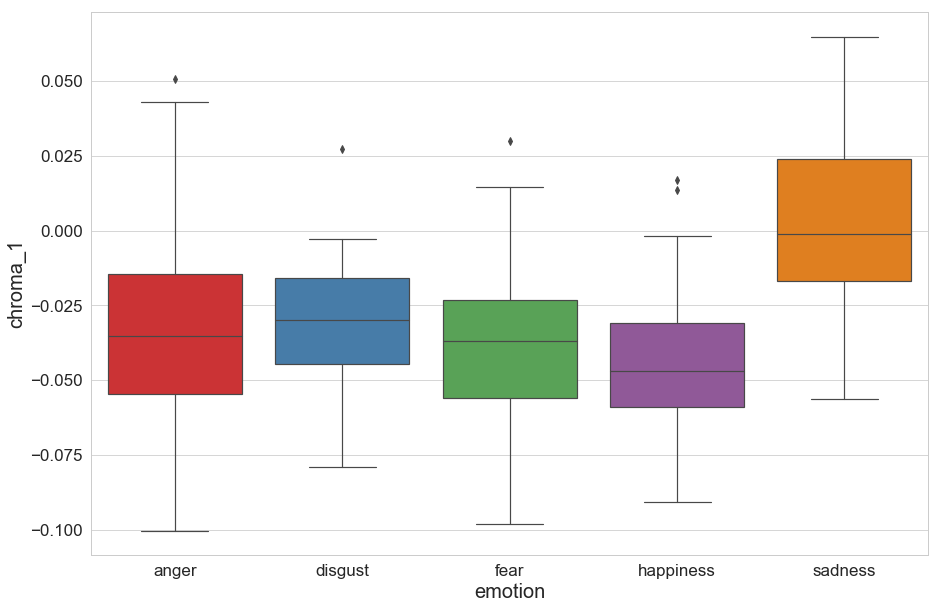

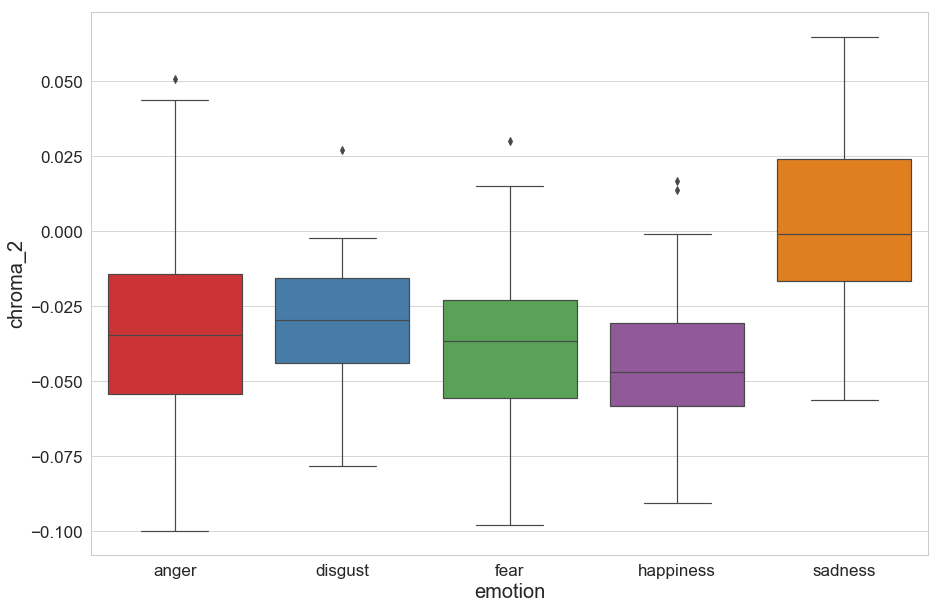

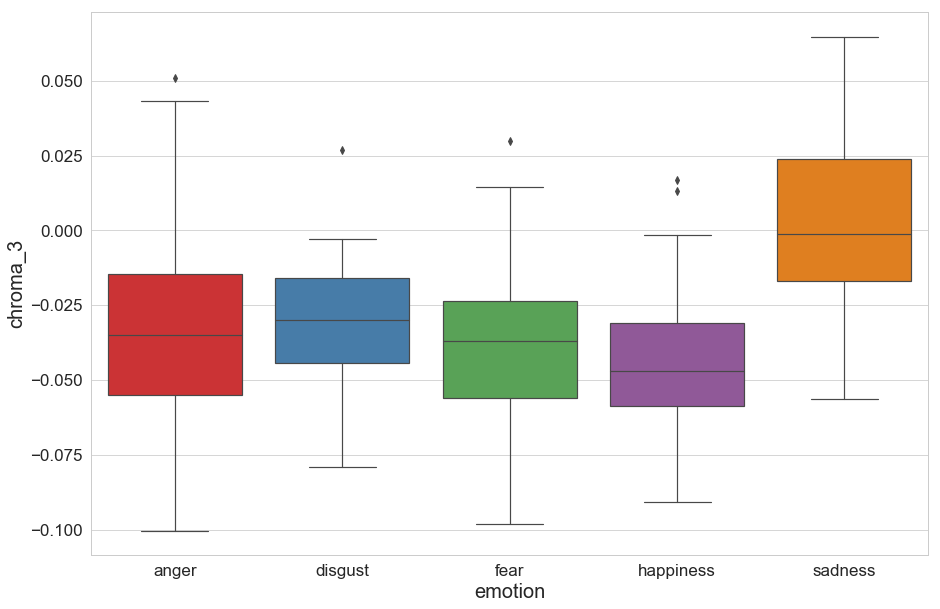

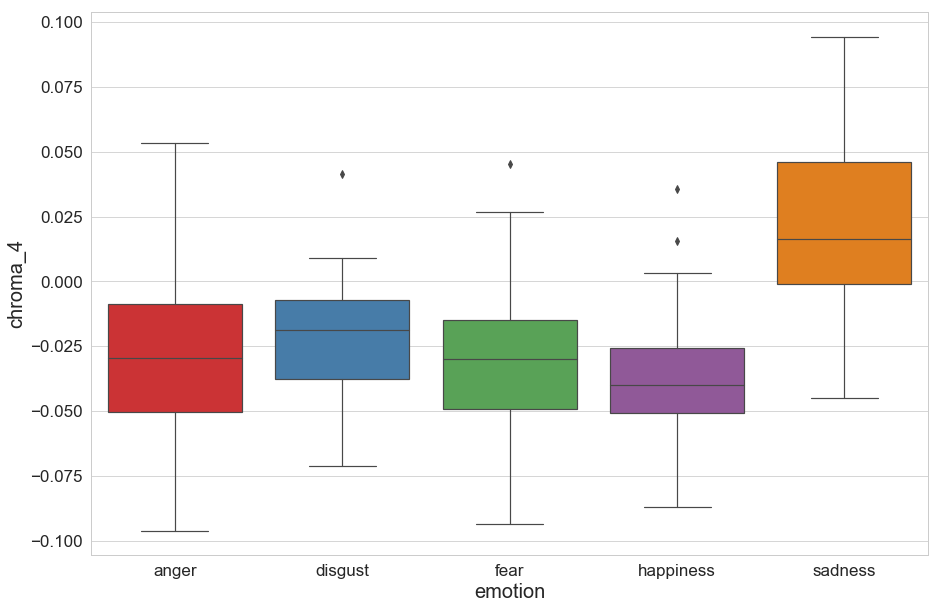

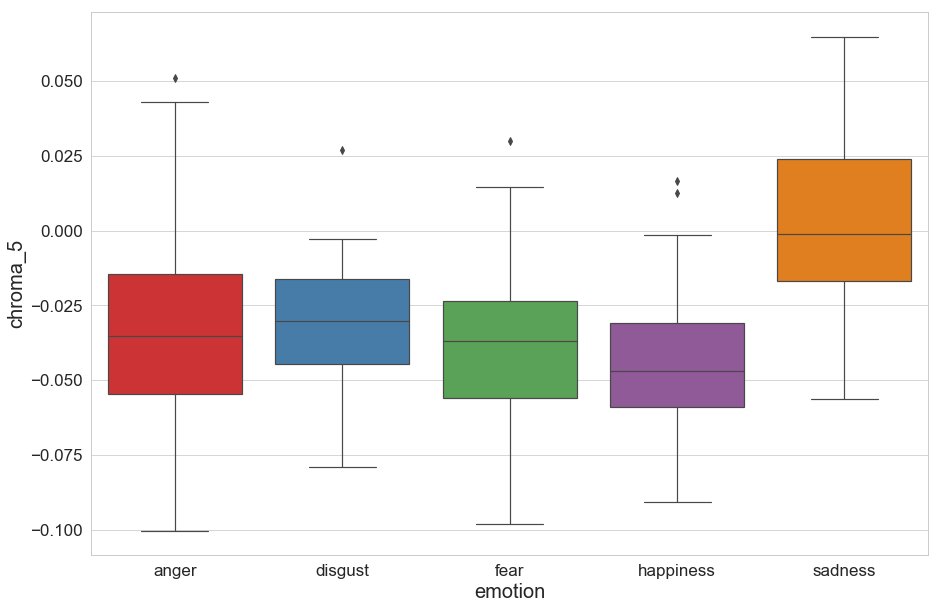

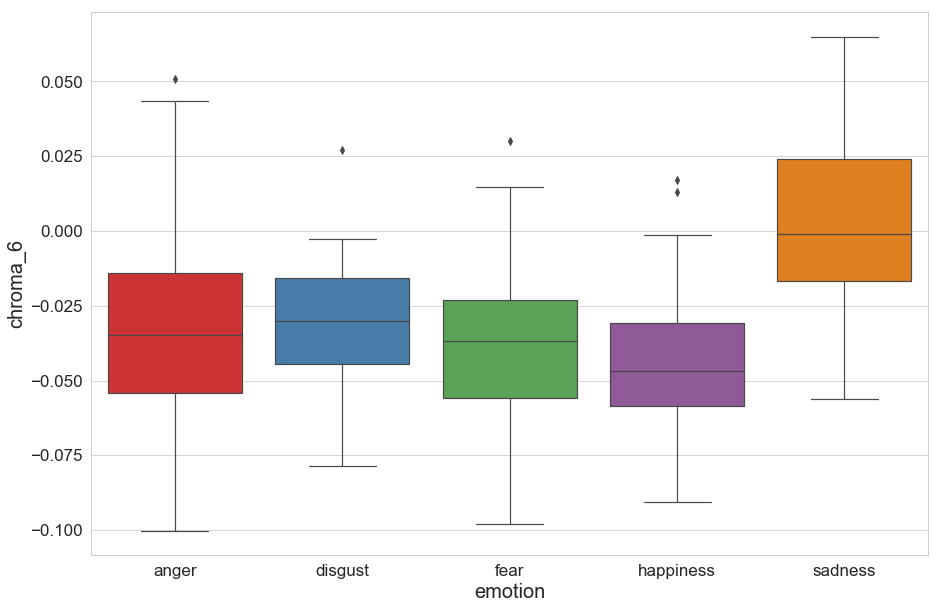

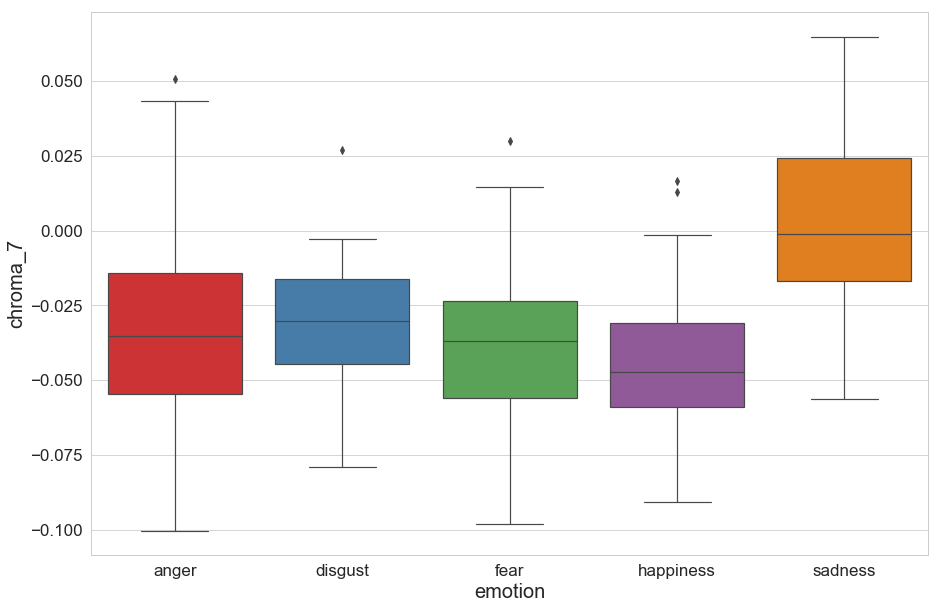

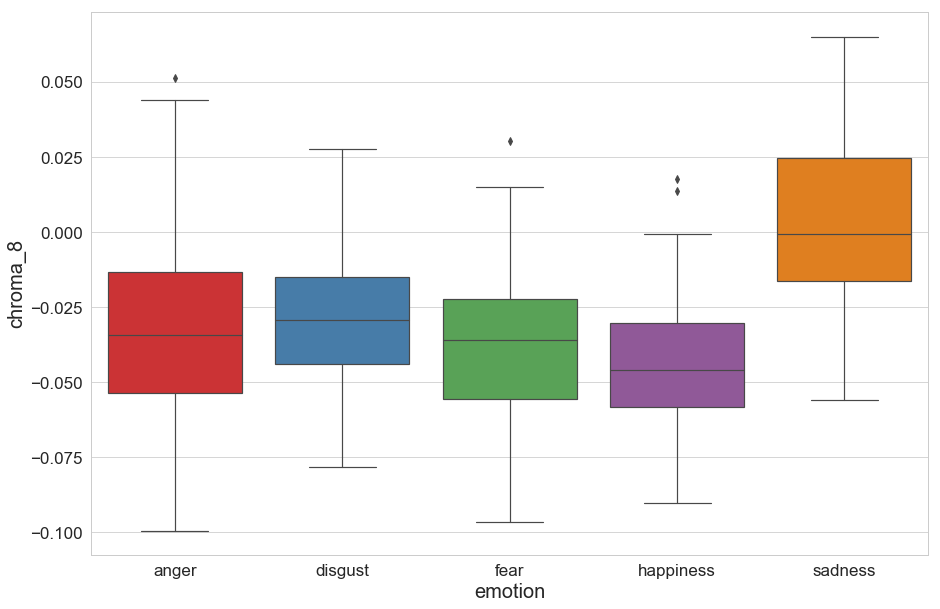

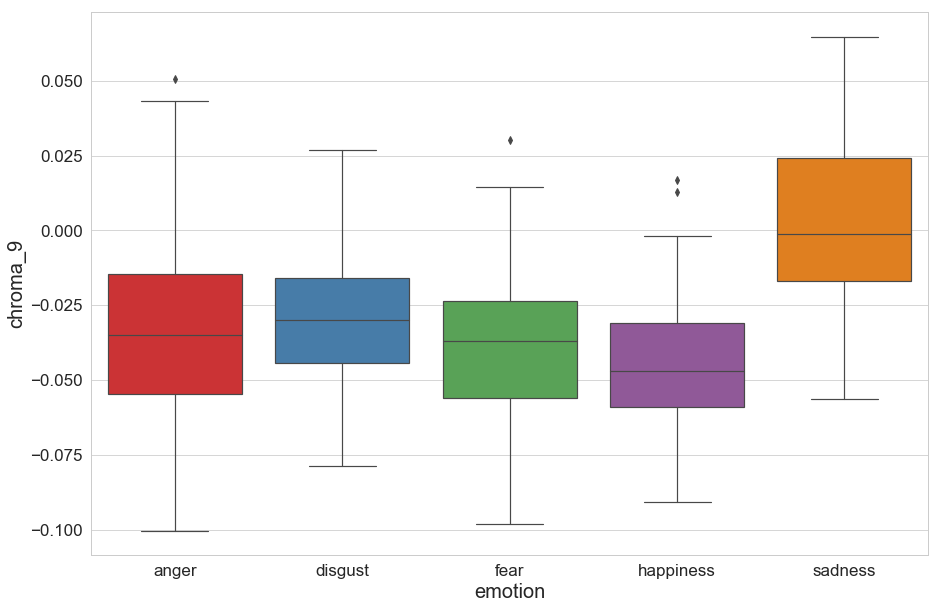

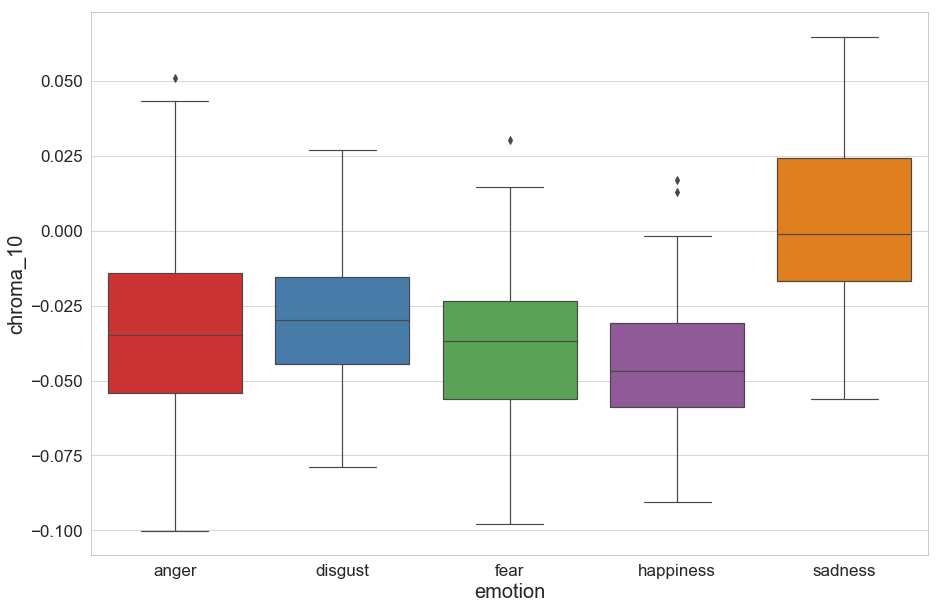

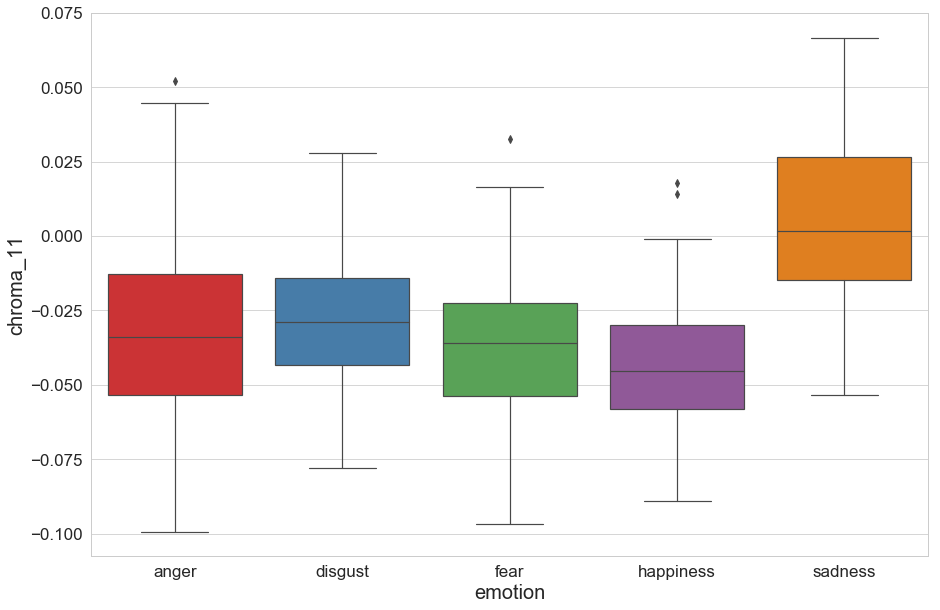

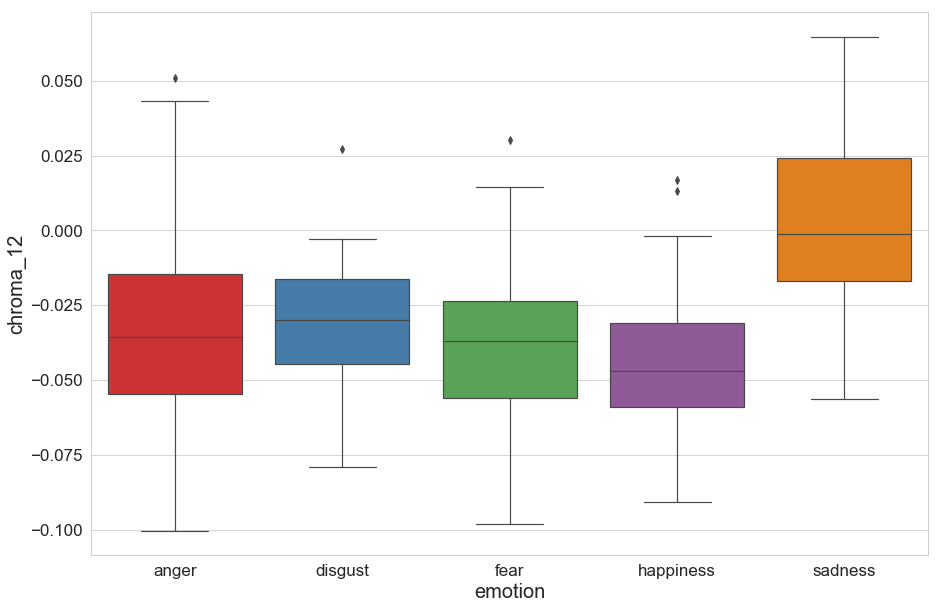

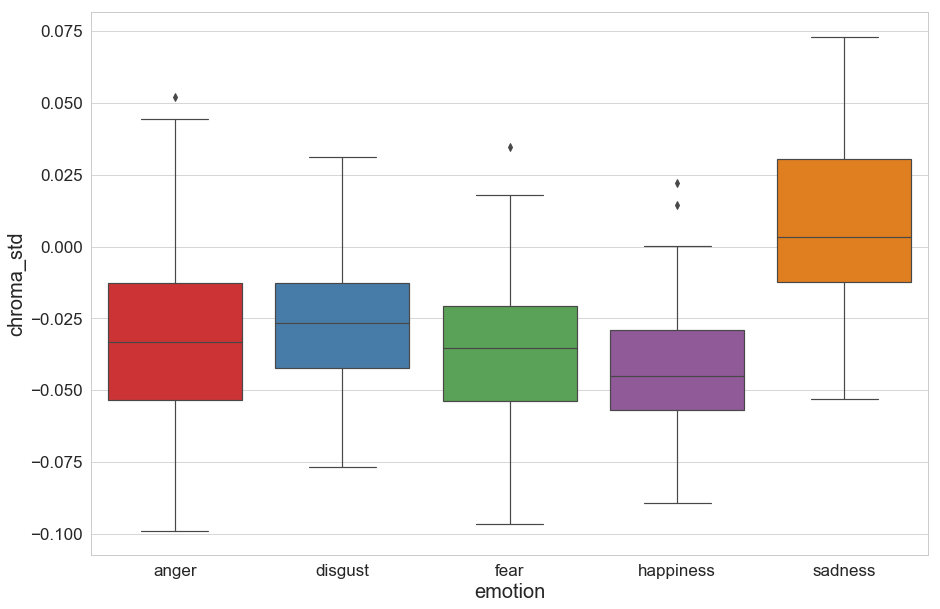

In [23]:
for chroma in label_features[21:34]:
    display_boxplot(chroma, df, df_emotions)